# Titanic - Machine Learning from Disaster

This project is an introductory project to ML, as well as Kaggle's competition ecosystem. In this project, we predict the survival of several passengers on the titanic, depending on their attributes. A rundown of the columns in the dataset we'll be using is shown below:


Variable|Definition|Key
---|---|---
survival|Did this passenger survive?|0 = No, 1 = Yes
pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd
sex|Gender of the passenger
Age|Age in years|
sibsp|# of siblings / spouses aboard the Titanic
parch|# of parents / children aboard the Titanic
ticket|Ticket number
fare|Passenger fare
cabin|Cabin number
embarked|The port from which each passenger boarded|C = Cherbourg, Q = Queenstown, S = Southampton


# 1 - Importing datasets and libraries

First let's import the libraries we'll need to work this problem

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

Now we import the dataset

In [2]:
X_train = pd.read_csv("train.csv")
X_test = pd.read_csv("test.csv")
display(X_train.head())
display(X_test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 2 - Data Cleaning

In this section, we'll get an overview of the dataset to check the following:
- All numeric data that will be used numerically are stored as a numeric dtype
- There are no missing values, and if there are, we take care of them by imputation or dropping
- Ensure that the target/label column is dropped from X_train.

First let's get an overview of the dataset.

In [3]:
display(X_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [4]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We're gonna merge `X_train` and `X_test` to make the data cleaning easier.

In [5]:
X_train['dataset'] = 'train'
X_test['dataset'] = 'test'
X_train = pd.concat([X_train,X_test],ignore_index=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  dataset      1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


We successfully merged the data, and looks like all the dtypes are properly assigned. In `X_train` it looks like the `Age`,`Cabin`, and `Embarked` columns are missing some values. Let's take a closer look.

Later in this notebook, we include an optional normalization step for the dataset and some columns need to be skipped for this step. Let's create a list to keep track of columns that we don't want normalized, appending to it as needed in the notebook.

In [6]:
cols_to_not_normalize = ['Survived','dataset']

## 2.1 - Cleaning `Cabin`

Let's first take a closer look at the `Cabin` column.

In [7]:
X_train['Cabin'].value_counts(dropna=False)

NaN                1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
                   ... 
A14                   1
E63                   1
E12                   1
E38                   1
C105                  1
Name: Cabin, Length: 187, dtype: int64

Looks like there are 187 (apart from `NaN`) unique values in the `Cabin` column, and about 1014 of those values are missing. Unfortunately, as a result, this means that imputation isn't a good candidate for cleaning this column, hence we'll need to drop it altogether.

### 2.1.A - Dropping `Cabin`

In [8]:
X_train = X_train.drop(columns = 'Cabin')
display(X_train.head())
display(X_train.info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,dataset
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,train


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Embarked     1307 non-null   object 
 11  dataset      1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


None

### 2.1.B - Doing something else...

In [9]:
# insert code here

## 2.2 - Cleaning `Embarked`

Next, let's take a look at the `Embarked` column, and see what course of action is best suited for cleaning up this column.

In [10]:
dataset_grouped = X_train.groupby(['dataset'])
dataset_grouped['Embarked'].value_counts(dropna=False)

dataset  Embarked
test     S           270
         C           102
         Q            46
train    S           644
         C           168
         Q            77
         NaN           2
Name: Embarked, dtype: int64

This column only has three unique values, suggesting imputation might be workable. However since only 2 out of 891 values are missing in this column, we can reliably drop the rows containing these missing values, confident that it won't noticeably affect the quality of our dataset. In this case, doing the easy thing (dropping the rows) is justified. Note we only want to do this for the training dataset, not the test dataset.

In [11]:
temp = X_train.loc[X_train['dataset']=='train',:].dropna(subset=['Embarked'])
temp['Embarked'].value_counts(dropna=False)

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
X_train = X_train.drop(index=X_train.index[X_train['dataset']=='train'])
X_train = pd.concat([X_train,temp])
X_train.shape[0]

1307

In [13]:
X_train.groupby(['dataset'])['Embarked'].value_counts(dropna=False)

dataset  Embarked
test     S           270
         C           102
         Q            46
train    S           644
         C           168
         Q            77
Name: Embarked, dtype: int64

Nice, we've successfully dropped the rows where the `Embarked` column is NaN.

## 2.3 - Cleaning `Age`

Now we tackle the `Age` column.

In [14]:
X_train['Age'].value_counts(dropna=False)

NaN      263
24.00     47
22.00     43
21.00     41
30.00     40
        ... 
11.50      1
0.33       1
66.00      1
38.50      1
74.00      1
Name: Age, Length: 99, dtype: int64

In [15]:
X_train['Age'].describe()

count    1044.000000
mean       29.842596
std        14.390739
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

<Axes: >

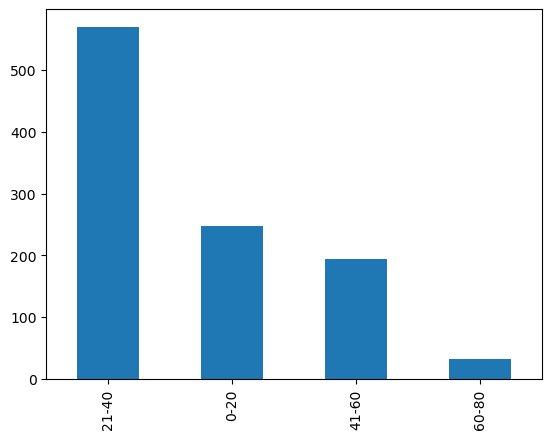

In [16]:
def age_group(element):
    if element <= 20:
        group_assignment = '0-20'
    elif (element > 20) and (element <= 40):
        group_assignment = '21-40'
    elif (element > 40) and (element <= 60):
        group_assignment = '41-60'
    else:
        group_assignment = '60-80'
        
    return group_assignment

temp = pd.DataFrame(X_train['Age'].dropna())
temp['age_group'] = X_train['Age'].apply(age_group)
temp['age_group'].value_counts().plot(kind='bar')

### 2.3.A - Deleting all rows with no `Age` input

The most straightforward way we can handle the lack of `Age` data is to delete all rows without a value for Age. On the one hand, this gives us a clean dataset, but on the other hand it decreases our number of training examples by 20%. Let's delete and see what happens.

In [15]:
X_train1 = X_train.dropna(subset=['Age'])
display(X_train1['Age'].value_counts(dropna=False))
display(X_train1.shape[0])

24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
60.5     1
76.0     1
67.0     1
22.5     1
74.0     1
Name: Age, Length: 98, dtype: int64

1044

Done. Let's move on

### 2.3.B - Mean imputing the rows missing an `Age`

Let's impute the mean of the `Age` column for all missing `Age` values

In [17]:
grouped = X_train.groupby('dataset')
age_mean = grouped['Age'].mean()['train']
X_train.loc[X_train['Age'].isnull(),'Age'] = age_mean
X_train['Age'].isnull().sum()

0

Success, moving on.

## 2.4 - Cleaning `Name`

The `name` column is a categorical. We have a couple options on how to use this column:
- We delete it altogether
- We can try to extract some info (for example the prefixes) from each name

We'll explore both approaches below.

### 2.4.A - Deleting the `Name` column altogether

In [149]:
X_train = X_train.drop(columns=['Name'])

### 2.4.B - Extracting info from the `Name` column, and then deleting it

In this section, we'll extract some information from the Name column. Let's extract prefixes (Mr., Mrs., etc) and store that in a separate column.

In [18]:
# pattern = r",\s(?P<prefix>\w+)\."
pattern = r",\s(?P<prefix>[\w\s]+)\."
prefix = X_train['Name'].str.extract(pattern)
prefix.head()

,prefix
891,Mr
892,Mrs
893,Mr
894,Mr
895,Mrs


In [19]:
prefix.value_counts(dropna=False)

prefix      
Mr              757
Miss            259
Mrs             196
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Major             2
Mlle              2
Sir               1
Capt              1
Mme               1
Lady              1
Jonkheer          1
Dona              1
Don               1
the Countess      1
dtype: int64

#### 2.4.B.A - Turning prefix into new features (Schema 1)

Let's turn the prefix column into the following column:
- **is_standard_prefix**: 1 if prefix is Mr, Mrs, Miss, Master, Ms; 0 otherwise (essentially if prefix is a non-standard prefix)
- **not_standard_prefix**: 0 if prefix is Mr, Mrs, Miss, Master, Ms; 1 otherwise (essentially if prefix is a non-standard prefix)

In [53]:
X_train['is_standard_prefix'] = (prefix == 'Mr')|(prefix == 'Mrs')|(prefix == 'Miss')|(prefix == 'Master')
X_train['not_standard_prefix'] = ~X_train['is_standard_prefix']
X_train['is_standard_prefix'] = X_train['is_standard_prefix'].astype(int)
X_train['not_standard_prefix'] = X_train['not_standard_prefix'].astype(int)

In [54]:
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,dataset,is_standard_prefix,not_standard_prefix
891,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,test,1,0
892,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,test,1,0
893,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,test,1,0
894,895,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,test,1,0
895,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,test,1,0


In [81]:
X_train = X_train.drop(columns=['Name'])
cols_to_not_normalize = cols_to_not_normalize + ['is_standard_prefix','not_standard_prefix']

['Survived', 'is_standard_prefix', 'not_standard_prefix']

#### 2.4.B.B - Turning prefix into new features (Schema 2), OHE

As an alternative, let's turn the prefix column into one-hot encoded columns--one for each unique prefix.

In [20]:
X_train.shape

(1307, 12)

In [21]:
oh_enc = OneHotEncoder()
prefix_encoded = oh_enc.fit_transform(prefix)
display(prefix_encoded.shape)
display(oh_enc.categories_)

(1307, 18)

[array(['Capt', 'Col', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major',
        'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir',
        'the Countess'], dtype=object)]

Now we insert these into X_train

In [22]:
oh_enc_cols = pd.Series(oh_enc.categories_[0])
oh_enc_cols = "prefix "+oh_enc_cols
X_train[oh_enc_cols] = pd.DataFrame.sparse.from_spmatrix(prefix_encoded,X_train.index) # needed to convert sparse matrix to dense matrix
display(X_train[oh_enc_cols])
display(X_train.shape)

X_train = X_train.drop(columns=['Name'])
cols_to_not_normalize = cols_to_not_normalize + list(oh_enc_cols)

,prefix Capt,prefix Col,prefix Don,prefix Dona,prefix Dr,prefix Jonkheer,prefix Lady,prefix Major,prefix Master,prefix Miss,prefix Mlle,prefix Mme,prefix Mr,prefix Mrs,prefix Ms,prefix Rev,prefix Sir,prefix the Countess
891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


(1307, 30)

## 2.5 - Cleaning `Ticket`

We have a couple options for cleaning this column. As before, we could do one of two things:
- Delete the column altogether
- Try to extract some info (for example, common letters) from each entry

We'll explore both approaches below.

### 2.5.A - Deleting the `Ticket` column altogether

In [23]:
X_train = X_train.drop(columns = ['Ticket'])

### 2.5.B - Extracting info from the `Ticket` column

In [32]:
# insert code here
X_train['Ticket'].value_counts(dropna=False)[51:80]

26360                 3
S.C./PARIS 2079       3
PP 9549               3
315153                3
2653                  3
PC 17569              3
2661                  3
367226                3
2650                  3
SOTON/O.Q. 3101315    3
PC 17761              3
11767                 3
248727                3
347080                3
2668                  3
363291                3
F.C.C. 13529          3
371110                3
29106                 3
35273                 3
C.A. 31921            3
230080                3
345773                3
2662                  3
C.A. 37671            3
C.A. 31029            3
A/4 48871             3
110152                3
248738                3
Name: Ticket, dtype: int64

Upon inspection, there are several unique values of `Ticket` in `X_train`. It's up to our discretion how to have these values be reflected in the training data. One possible way is to group `Ticket` into three categories:
1. Contains numbers only
2. Contains letters and numbers
3. Contains letters only

Let's see if we can create a new feature out of these groupings.

In [56]:
ptr_word_only = r"^[^\d\s]+$" # matches word only
ptr_num_only = r"^[\d]+$" # matches numbers only
X_train['ticket_word_only'] = X_train['Ticket'].str.contains(ptr_word_only, regex=True)
X_train['ticket_num_only'] = X_train['Ticket'].str.contains(ptr_num_only, regex=True)
X_train['ticket_num_and_word'] = (~X_train['ticket_word_only']) & (~X_train['ticket_num_only'])
display(X_train[['ticket_word_only','ticket_num_only','ticket_num_and_word']].sum(axis=1).value_counts()) # just to confirm
X_train[['ticket_word_only','ticket_num_only','ticket_num_and_word']] = X_train[['ticket_word_only','ticket_num_only','ticket_num_and_word']].astype(int)
X_train.head()

1    1307
dtype: int64

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,...,prefix Mme,prefix Mr,prefix Mrs,prefix Ms,prefix Rev,prefix Sir,prefix the Countess,ticket_word_only,ticket_num_only,ticket_num_and_word
891,892,NaN,3,male,34.5,0,0,330911,7.8292,Q,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0
892,893,NaN,3,female,47.0,1,0,363272,7.0000,S,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0
893,894,NaN,2,male,62.0,0,0,240276,9.6875,Q,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0
894,895,NaN,3,male,27.0,0,0,315154,8.6625,S,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0
895,896,NaN,3,female,22.0,1,1,3101298,12.2875,S,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0


OK looks like we successfully created new feature columns. Now we'll remove the ticket column.

In [60]:
# X_train = X_train.drop(columns = ['Ticket'])
cols_to_not_normalize = cols_to_not_normalize + ['ticket_word_only','ticket_num_only','ticket_num_and_word']

## 2.6 - Cleaning `Fare`

The Fare column is missing only one value. We have a couple of options to clean this column:
- Impute the missing value with the average of the column
- Use some fancy data analysis to deduce what the right value to impute is
- Use another ML model to populate this missing value.

Unfortunately we can't just delete this row since it's part of the `test` dataset.

### 2.6.A - Imputing missing `Fare` values with the average

In [58]:
mean_fare = X_train.loc[X_train['dataset']=='train','Fare'].mean()
X_train.loc[X_train['Fare'].isnull(),'Fare'] = mean_fare

## 2.7 - Cleaning `PassengerId`

The PassengerId column is likely just a unique identifier for each passenger, with no correlation to survival. There are two ways we can clean this column. We could either get rid of it altogether or keep it and normalize it (its values are much greater than values in other columns). We'll explore both options.

### 2.7.A - Deleting the `PassengerId` column

In [59]:
pass_id = X_train['PassengerId']
X_train = X_train.drop(columns = ['PassengerId'])

### 2.7.B - Keeping and normalizing `PassengerId`

In [27]:
# insert code here

## 2.8 - Encoding Categorical Features

Since the ML models we're using only work with numerical data, we'll need to convert any data of dtype `object` to something numerical. Let's take a look at the columns of dtype `object`

In [26]:
X_train.columns[X_train.dtypes == 'object'].tolist()

['Sex', 'Embarked', 'dataset']

We know that the `dataset` column is of our own making, so we won't encode it. We have a couple encoding options for this dataset, namely Ordinal Encoding and One Hot encoding. We'll explore both below.

### 2.8.A - Ordinal Encoding

Ordinal encoding is generally used for features whose values are "rankable" so to speak. For example for an education feature whose values are `[Bachelors, Masters, PhD]`, the values are rankable because a PhD is more educated than a Masters, who is in turn more educated than a Bachelors degree holder.

Since the columns we plan on encoding aren't rankable, I suspect using an Ordinal encoder isn't the right approach. Nevertheless, we'll do it for exploratory sakes.

In [30]:
cols_to_not_normalize = cols_to_not_normalize + ['Sex']
cat_enc = OrdinalEncoder()
X_train[['Sex','Embarked']] = cat_enc.fit_transform(X_train[['Sex','Embarked']])
X_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,dataset,prefix Capt,...,prefix Master,prefix Miss,prefix Mlle,prefix Mme,prefix Mr,prefix Mrs,prefix Ms,prefix Rev,prefix Sir,prefix the Countess
891,NaN,3,1.0,34.5,0,0,7.8292,1.0,test,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
892,NaN,3,0.0,47.0,1,0,7.0000,2.0,test,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
893,NaN,2,1.0,62.0,0,0,9.6875,1.0,test,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
894,NaN,3,1.0,27.0,0,0,8.6625,2.0,test,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
895,NaN,3,0.0,22.0,1,1,12.2875,2.0,test,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### 2.8.B - One Hot Encoding

In [61]:
ohe1 = OneHotEncoder()
ohe_result = ohe1.fit_transform(X_train[['Sex','Embarked']])
ohe_result

<1307x5 sparse matrix of type '<class 'numpy.float64'>'
	with 2614 stored elements in Compressed Sparse Row format>

In [62]:
X_train[ohe1.get_feature_names_out()] = pd.DataFrame.sparse.from_spmatrix(ohe_result,X_train.index)
X_train = X_train.drop(columns=['Sex','Embarked'])
cols_to_not_normalize = cols_to_not_normalize + list(ohe1.get_feature_names_out())
X_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,dataset,prefix Capt,prefix Col,prefix Don,...,prefix Sir,prefix the Countess,ticket_word_only,ticket_num_only,ticket_num_and_word,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
891,NaN,3,34.5,0,0,7.8292,test,0.0,0.0,0.0,...,0.0,0.0,0,1,0,0.0,1.0,0.0,1.0,0.0
892,NaN,3,47.0,1,0,7.0000,test,0.0,0.0,0.0,...,0.0,0.0,0,1,0,1.0,0.0,0.0,0.0,1.0
893,NaN,2,62.0,0,0,9.6875,test,0.0,0.0,0.0,...,0.0,0.0,0,1,0,0.0,1.0,0.0,1.0,0.0
894,NaN,3,27.0,0,0,8.6625,test,0.0,0.0,0.0,...,0.0,0.0,0,1,0,0.0,1.0,0.0,0.0,1.0
895,NaN,3,22.0,1,1,12.2875,test,0.0,0.0,0.0,...,0.0,0.0,0,1,0,1.0,0.0,0.0,0.0,1.0


## 2.9 - Normalizing the dataset

Normalizing the dataset ensures that all weights get updated at a similar pace, encouraging quick convergence. Given models with constraints like max_iter, normalizing could allow us to get to a lower minimum error value, and therefore a more accurate model. Let's normalize the dataset below.

In [63]:
z_score_scaler = StandardScaler()
z_score_scaler.fit(X_train.drop(columns=cols_to_not_normalize).loc[X_train['dataset']=='train',:]) # fit on train data only
X_train.loc[:,X_train.drop(columns=cols_to_not_normalize).columns] = z_score_scaler.transform(X_train.drop(columns=cols_to_not_normalize)) # transform train and test data
X_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,dataset,prefix Capt,prefix Col,prefix Don,...,prefix Sir,prefix the Countess,ticket_word_only,ticket_num_only,ticket_num_and_word,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
891,NaN,0.825209,0.374808,-0.475199,-0.474326,-0.488579,test,0.0,0.0,0.0,...,0.0,0.0,0,1,0,0.0,1.0,0.0,1.0,0.0
892,NaN,0.825209,1.339236,0.431350,-0.474326,-0.505273,test,0.0,0.0,0.0,...,0.0,0.0,0,1,0,1.0,0.0,0.0,0.0,1.0
893,NaN,-0.373501,2.496550,-0.475199,-0.474326,-0.451165,test,0.0,0.0,0.0,...,0.0,0.0,0,1,0,0.0,1.0,0.0,1.0,0.0
894,NaN,0.825209,-0.203849,-0.475199,-0.474326,-0.471802,test,0.0,0.0,0.0,...,0.0,0.0,0,1,0,0.0,1.0,0.0,0.0,1.0
895,NaN,0.825209,-0.589620,0.431350,0.765897,-0.398819,test,0.0,0.0,0.0,...,0.0,0.0,0,1,0,1.0,0.0,0.0,0.0,1.0


## 2.10 - Separating the datasets into `X_train`, `y_train`, and `X_test`

Finally, we need to separate our training dataset from our test dataset, as well as our target from our features within the training dataset.

In [64]:
y_train = X_train.loc[X_train['dataset'] == 'train','Survived']
X_train = X_train.drop(columns=['Survived'])

X_test = X_train.loc[X_train['dataset'] == 'test',:]
X_test = X_test.drop(columns=['dataset'])

X_train = X_train.loc[X_train['dataset'] == 'train',:]
X_train = X_train.drop(columns=['dataset'])


display(X_test.shape)
display(X_train.shape)
display(y_train.shape)

(418, 31)

(889, 31)

(889,)

The dimensions look compatible. Now let's finally check that there are no null values in any of the datasets.

In [65]:
X_test.isnull().sum().sum() + X_train.isnull().sum().sum() + y_train.isnull().sum()

0

In [66]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,prefix Capt,prefix Col,prefix Don,prefix Dona,prefix Dr,...,prefix Sir,prefix the Countess,ticket_word_only,ticket_num_only,ticket_num_and_word,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.825209,-0.589620,0.431350,-0.474326,-0.500240,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,1,0.0,1.0,0.0,0.0,1.0
1,-1.572211,0.644848,0.431350,-0.474326,0.788947,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,1,1.0,0.0,1.0,0.0,0.0
2,0.825209,-0.281003,-0.475199,-0.474326,-0.486650,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,1,1.0,0.0,0.0,0.0,1.0
3,-1.572211,0.413385,0.431350,-0.474326,0.422861,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,1,0,1.0,0.0,0.0,0.0,1.0
4,0.825209,0.413385,-0.475199,-0.474326,-0.484133,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,1,0,0.0,1.0,0.0,0.0,1.0


Great, now that we've cleaned up our `X_train`, `y_Train`, and `X_test` datasets, it's time to train our model!

# 3 - Training the ML model

## 3.1 - Linear Regression Model

First model we're going to try is a linear model with a rounding function. I don't expect this model to perform very well--here's how it did.

|2.1|2.3|2.4|2.5|2.6|2.7|2.8|2.9|filename|Score
|---|---|---|---|---|---|---|---|---|---|
|A|A|A|A|A|A|A|&#x2715;|submission.csv|0.768|
|A|A|B.A|A|A|A|A|&#x2715;|submission3.csv|0.770|
|A|A|B.A|A|A|A|A|&check;|submission5.csv|0.770|
|A|B|B.B|A|A|A|A|&check;|submission7.csv|0.775|
|A|B|B.B|A|A|A|B|&check;|submission10.csv|0.778|
|A|B|B.B|B|A|A|B|&check;|submission13.csv|0.778|

In [67]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

/Users/adelusi/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/adelusi/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [68]:
y_pred1 = y_pred.round().astype(int)
y_pred1

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [69]:
temp = X_test.merge(pass_id,how='inner',left_index=True,right_index=True)
submission = pd.DataFrame(temp['PassengerId'])
submission['Survived'] = y_pred1
submission = submission.set_index('PassengerId')
submission.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [70]:
submission.to_csv('submissions/submission13.csv')

## 3.2 - Logistic Regression Model

Next let's try a logistic regression model, more suited to the task of classification. I expect this model to perform a bit better than the linear one. Here's how it did.

|2.1|2.3|2.4|2.5|2.6|2.7|2.8|2.9|filename|Score
|---|---|---|---|---|---|---|---|---|---|
|A|A|A|A|A|A|A|&#x2715;|submission1.csv|0.770|
|A|A|A|A|A|A|A|&check;|submission2.csv|0.768|
|A|A|B.A|A|A|A|A|&#x2715;|submission4.csv|0.770|
|A|A|B.A|A|A|A|A|&check;|submission6.csv|0.768|
|A|B|B.B|A|A|A|A|&check;|submission8.csv|0.770|
|A|B|B.B|A|A|A|B|&check;|submission11.csv|0.773|
|A|B|B.B|B|A|A|B|&check;|submission14.csv|0.773|

Surprisingly didn't perform that much better than Linear regression in terms of accuracy.

In [71]:
model = LogisticRegression(max_iter=1000) # wasn't converging with default value of 100
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

/Users/adelusi/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/adelusi/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [72]:
y_pred1 = y_pred.astype(int)
y_pred1

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [73]:
temp = X_test.merge(pass_id,how='inner',left_index=True,right_index=True)
submission = pd.DataFrame(temp['PassengerId'])
submission['Survived'] = y_pred1
submission = submission.set_index('PassengerId')
submission.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [74]:
submission.to_csv('submissions/submission14.csv')

## 3.3 - Neural Network

Next let's try a logistic regression model, more suited to the task of classification. I expect this model to perform a bit better than the linear one. Here's how it did.

|2.1|2.3|2.4|2.5|2.6|2.7|2.8|2.9|# of epochs|filename|Score
|---|---|---|---|---|---|---|---|---|---|---|
|A|B|B.B|A|A|A|A|&check;|10|submission9.csv|0.773|
|A|B|B.B|A|A|A|B|&check;|10|submission12.csv|0.773|
|A|B|B.B|B|A|A|B|&check;|10|submission15.csv|0.773|
|A|B|B.B|B|A|A|B|&check;|20|submission16.csv|0.773|

Things to note:
- Changing the number of epochs doesn't seem to do anything for us

In [75]:
# Defining neural network model parameters, compiling the model
my_model = Sequential([
    Dense(units=25, activation=relu),
    Dense(units=15, activation=relu),
    Dense(units=1, activation=linear)]
)
my_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy'])

Metal device set to: Apple M1 Pro


2023-03-19 23:23:42.978962: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-19 23:23:42.979298: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [79]:
my_model.fit(X_train, y_train,epochs=20)
y_pred_nn = my_model.predict(X_test)
y_pred_nn = tf.math.sigmoid(y_pred_nn)
y_pred_nn = tf.cast(y_pred.round(), tf.int8)

Epoch 1/20
28/28 [==============================] - 0s 8ms/step - loss: 0.4043 - accuracy: 0.8313
Epoch 2/20
28/28 [==============================] - 0s 8ms/step - loss: 0.4010 - accuracy: 0.8358
Epoch 3/20
28/28 [==============================] - 0s 8ms/step - loss: 0.3989 - accuracy: 0.8335
Epoch 4/20
28/28 [==============================] - 0s 8ms/step - loss: 0.3965 - accuracy: 0.8324
Epoch 5/20
28/28 [==============================] - 0s 8ms/step - loss: 0.3935 - accuracy: 0.8391
Epoch 6/20
28/28 [==============================] - 0s 9ms/step - loss: 0.3928 - accuracy: 0.8380
Epoch 7/20
28/28 [==============================] - 0s 9ms/step - loss: 0.3899 - accuracy: 0.8414
Epoch 8/20
28/28 [==============================] - 0s 8ms/step - loss: 0.3883 - accuracy: 0.8403
Epoch 9/20
28/28 [==============================] - 0s 8ms/step - loss: 0.3873 - accuracy: 0.8403
Epoch 10/20
28/28 [==============================] - 0s 8ms/step - loss: 0.3852 - accuracy: 0.8380
Epoch 11/20
28/28 [

In [80]:
temp = X_test.merge(pass_id,how='inner',left_index=True,right_index=True)
submission = pd.DataFrame(temp['PassengerId'])
submission['Survived'] = y_pred_nn
submission = submission.set_index('PassengerId')
submission.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [81]:
submission.to_csv('submissions/submission16.csv')

Possible next steps:
- Feature engineering in data cleaning step to pull additional information from different features - Ongoing
- Polynomial feature engineering
- Try regularization in all models